In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import imageio


In [8]:
# Function to generate a simplified dSprites-like image based on latent factors
def generate_dsprites_image(shape, scale, rotation, pos_x, pos_y):
    """
    Generate a binary image based on latent factors.
    - shape: 0 (square), 1 (ellipse), 2 (heart)
    - scale: Size multiplier (e.g., 1.0 to 2.0)
    - rotation: Angle in degrees
    - pos_x, pos_y: Position in range [-1, 1]
    """
    # Create a 64x64 blank canvas
    canvas = np.zeros((64, 64))
    
    # Define the shape
    if shape == 0:  # Square
        size = int(10 * scale)
        x = int(32 + 32 * pos_x) - size // 2
        y = int(32 + 32 * pos_y) - size // 2
        canvas[y:y+size, x:x+size] = 1
    elif shape == 1:  # Ellipse
        size = int(10 * scale)
        x = int(32 + 32 * pos_x)
        y = int(32 + 32 * pos_y)
        for i in range(64):
            for j in range(64):
                if ((i - y) / size)**2 + ((j - x) / (size / 2))**2 <= 1:
                    canvas[i, j] = 1
    elif shape == 2:  # Heart (rough approximation)
        size = int(10 * scale)
        x = int(32 + 32 * pos_x)
        y = int(32 + 32 * pos_y)
        for i in range(64):
            for j in range(64):
                if ((i - y) / size)**2 + ((j - x) / size)**2 <= 1 and i > y:
                    canvas[i, j] = 1
    
    # Apply rotation if needed
    if rotation != 0:
        canvas = rotate(canvas, rotation, reshape=False)
    
    return canvas

(array([  197, 42384,   109,    59,    70,    54,    70,   103,  1778,
         232]), array([-0.22926511, -0.0857636 ,  0.0577379 ,  0.2012394 ,  0.3447409 ,
        0.48824241,  0.63174391,  0.77524541,  0.91874691,  1.06224842,
        1.20574992]))


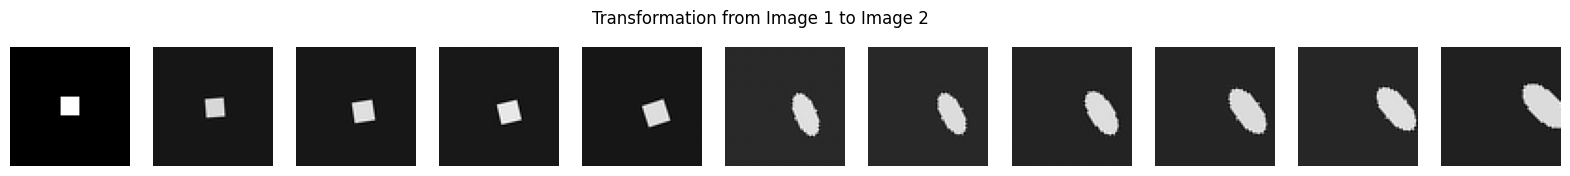

In [13]:

# Define two dSprites images using their latent factors
# Image 1: Square, scale=1.0, rotation=0°, pos_x=0.0, pos_y=0.0
# Image 2: Ellipse, scale=1.5, rotation=45°, pos_x=0.5, pos_y=0.5
latents_1 = {'shape': 0, 'scale': 1.0, 'rotation': 0, 'pos_x': 0.0, 'pos_y': 0.0}
latents_2 = {'shape': 1, 'scale': 1.5, 'rotation': 45, 'pos_x': 0.5, 'pos_y': 0.5}

# Number of steps for the transformation
num_steps = 10

# Generate intermediate latent factors
intermediate_latents = []
for step in range(num_steps + 1):
    alpha = step / num_steps  # Interpolation factor from 0 to 1
    # Interpolate continuous factors
    scale = (1 - alpha) * latents_1['scale'] + alpha * latents_2['scale']
    rotation = (1 - alpha) * latents_1['rotation'] + alpha * latents_2['rotation']
    pos_x = (1 - alpha) * latents_1['pos_x'] + alpha * latents_2['pos_x']
    pos_y = (1 - alpha) * latents_1['pos_y'] + alpha * latents_2['pos_y']
    
    # Handle categorical shape: switch halfway
    shape = latents_1['shape'] if alpha < 0.5 else latents_2['shape']
    
    # Store the interpolated factors
    intermediate_latents.append({
        'shape': shape,
        'scale': scale,
        'rotation': rotation,
        'pos_x': pos_x,
        'pos_y': pos_y
    })

# Generate images for each set of latent factors
images = [generate_dsprites_image(**latents) for latents in intermediate_latents]
print(np.histogram(images))

imageio.mimsave('transformation.gif', images, duration=0.2, loop=0)

# Visualize the transformation
fig, axes = plt.subplots(1, num_steps + 1, figsize=(20, 2))
for ax, img in zip(axes, images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.suptitle("Transformation from Image 1 to Image 2")
plt.show()

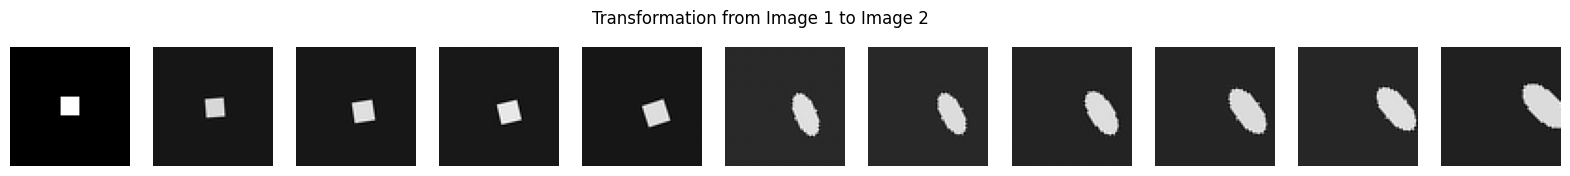

GIF saved as 'transformation.gif'


In [15]:

# Define two dSprites images using their latent factors
# Image 1: Square, scale=1.0, rotation=0°, pos_x=0.0, pos_y=0.0
# Image 2: Ellipse, scale=1.5, rotation=45°, pos_x=0.5, pos_y=0.5
latents_1 = {'shape': 0, 'scale': 1.0, 'rotation': 0, 'pos_x': 0.0, 'pos_y': 0.0}
latents_2 = {'shape': 1, 'scale': 1.5, 'rotation': 45, 'pos_x': 0.5, 'pos_y': 0.5}

# Number of steps for the transformation
num_steps = 10

# Generate intermediate latent factors
intermediate_latents = []
images = []  # List to store generated images for GIF
for step in range(num_steps + 1):
    alpha = step / num_steps  # Interpolation factor from 0 to 1
    # Interpolate continuous factors
    scale = (1 - alpha) * latents_1['scale'] + alpha * latents_2['scale']
    rotation = (1 - alpha) * latents_1['rotation'] + alpha * latents_2['rotation']
    pos_x = (1 - alpha) * latents_1['pos_x'] + alpha * latents_2['pos_x']
    pos_y = (1 - alpha) * latents_1['pos_y'] + alpha * latents_2['pos_y']
    
    # Handle categorical shape: switch halfway
    shape = latents_1['shape'] if alpha < 0.5 else latents_2['shape']
    
    # Store the interpolated factors
    intermediate_latents.append({
        'shape': shape,
        'scale': scale,
        'rotation': rotation,
        'pos_x': pos_x,
        'pos_y': pos_y
    })
    
    # Generate the image for the current latent factors
    img = generate_dsprites_image(**intermediate_latents[-1])
    images.append(img)  # Append the generated image to the list

# Visualize the transformation
fig, axes = plt.subplots(1, num_steps + 1, figsize=(20, 2))
for ax, img in zip(axes, images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.suptitle("Transformation from Image 1 to Image 2")
plt.show()

# Save the images as a GIF
gif_path = 'transformation.gif'
imageio.mimsave(gif_path, images, duration=0.5)  # Adjust duration as needed
print(f"GIF saved as '{gif_path}'")

GIF saved as 'transformation.gif'


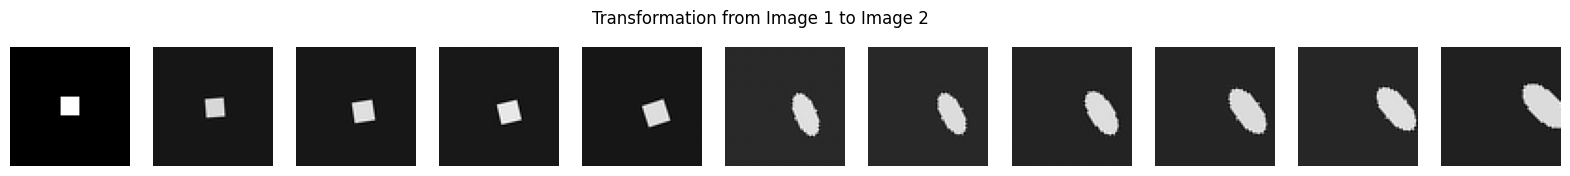

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import imageio

# Function to generate a simplified dSprites-like image based on latent factors
def generate_dsprites_image(shape, scale, rotation, pos_x, pos_y):
    """
    Generate a binary image based on latent factors.
    - shape: 0 (square), 1 (ellipse), 2 (heart)
    - scale: Size multiplier (e.g., 1.0 to 2.0)
    - rotation: Angle in degrees
    - pos_x, pos_y: Position in range [-1, 1]
    """
    # Create a 64x64 blank canvas
    canvas = np.zeros((64, 64))
    
    # Define the shape
    if shape == 0:  # Square
        size = int(10 * scale)
        x = int(32 + 32 * pos_x) - size // 2
        y = int(32 + 32 * pos_y) - size // 2
        canvas[y:y+size, x:x+size] = 1
    elif shape == 1:  # Ellipse
        size = int(10 * scale)
        x = int(32 + 32 * pos_x)
        y = int(32 + 32 * pos_y)
        for i in range(64):
            for j in range(64):
                if ((i - y) / size)**2 + ((j - x) / (size / 2))**2 <= 1:
                    canvas[i, j] = 1
    elif shape == 2:  # Heart (rough approximation)
        size = int(10 * scale)
        x = int(32 + 32 * pos_x)
        y = int(32 + 32 * pos_y)
        for i in range(64):
            for j in range(64):
                if ((i - y) / size)**2 + ((j - x) / size)**2 <= 1 and i > y:
                    canvas[i, j] = 1
    
    # Apply rotation if needed
    if rotation != 0:
        canvas = rotate(canvas, rotation, reshape=False)
    
    return canvas

# Define two dSprites images using their latent factors
latents_1 = {'shape': 0, 'scale': 1.0, 'rotation': 0, 'pos_x': 0.0, 'pos_y': 0.0}
latents_2 = {'shape': 1, 'scale': 1.5, 'rotation': 45, 'pos_x': 0.5, 'pos_y': 0.5}

# Number of steps for the transformation
num_steps = 10

# Generate intermediate latent factors
intermediate_latents = []
for step in range(num_steps + 1):
    alpha = step / num_steps  # Interpolation factor from 0 to 1
    # Interpolate continuous factors
    scale = (1 - alpha) * latents_1['scale'] + alpha * latents_2['scale']
    rotation = (1 - alpha) * latents_1['rotation'] + alpha * latents_2['rotation']
    pos_x = (1 - alpha) * latents_1['pos_x'] + alpha * latents_2['pos_x']
    pos_y = (1 - alpha) * latents_1['pos_y'] + alpha * latents_2['pos_y']
    
    # Handle categorical shape: switch halfway
    shape = latents_1['shape'] if alpha < 0.5 else latents_2['shape']
    
    # Store the interpolated factors
    intermediate_latents.append({
        'shape': shape,
        'scale': scale,
        'rotation': rotation,
        'pos_x': pos_x,
        'pos_y': pos_y
    })

# Generate images for each set of latent factors
images = [generate_dsprites_image(**latents) for latents in intermediate_latents]

# Save the frames as an animated GIF
imageio.mimsave('transformation.gif', [img * 255 for img in images], duration=5, loop=0)
print("GIF saved as 'transformation.gif'")

# Visualize the transformation
fig, axes = plt.subplots(1, num_steps + 1, figsize=(20, 2))
for ax, img in zip(axes, images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.suptitle("Transformation from Image 1 to Image 2")
plt.show()

GIF saved as 'transformation.gif'


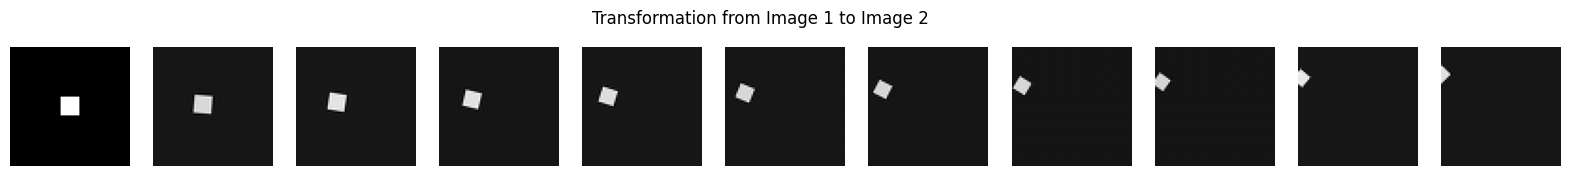

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
import imageio

# Function to generate a simplified dSprites-like image based on latent factors
def generate_dsprites_image(shape, scale, rotation, pos_x, pos_y):
    """
    Generate a binary image based on latent factors.
    - shape: 0 (square), 1 (ellipse), 2 (heart)
    - scale: Size multiplier (e.g., 1.0 to 2.0)
    - rotation: Angle in degrees
    - pos_x, pos_y: Position in range [-1, 1]
    """
    # Create a 64x64 blank canvas
    canvas = np.zeros((64, 64))
    
    # Define the shape
    if shape == 0:  # Square
        size = int(10 * scale)
        x = int(32 + 32 * pos_x) - size // 2
        y = int(32 + 32 * pos_y) - size // 2
        canvas[y:y+size, x:x+size] = 1
    elif shape == 1:  # Ellipse
        size = int(10 * scale)
        x = int(32 + 32 * pos_x)
        y = int(32 + 32 * pos_y)
        for i in range(64):
            for j in range(64):
                if ((i - y) / size)**2 + ((j - x) / (size / 2))**2 <= 1:
                    canvas[i, j] = 1
    elif shape == 2:  # Heart (rough approximation)
        size = int(10 * scale)
        x = int(32 + 32 * pos_x)
        y = int(32 + 32 * pos_y)
        for i in range(64):
            for j in range(64):
                if ((i - y) / size)**2 + ((j - x) / size)**2 <= 1 and i > y:
                    canvas[i, j] = 1
    
    return canvas

# Function to create a transformation matrix
def create_transformation_matrix(scale, rotation, translation):
    """Create a transformation matrix for scaling, rotation, and translation."""
    # Convert rotation angle from degrees to radians
    theta = np.radians(rotation)
    
    # Create the transformation matrix
    transformation_matrix = np.array([
        [scale * np.cos(theta), -scale * np.sin(theta), translation[0]],
        [scale * np.sin(theta), scale * np.cos(theta), translation[1]],
        [0, 0, 1]
    ])
    
    return transformation_matrix

# Define two dSprites images using their latent factors
latents_1 = {'shape': 0, 'scale': 1.0, 'rotation': 0, 'pos_x': 0.0, 'pos_y': 0.0}
latents_2 = {'shape': 1, 'scale': 1.5, 'rotation': 45, 'pos_x': 0.5, 'pos_y': 0.5}

# Generate the base images
image_1 = generate_dsprites_image(**latents_1)
image_2 = generate_dsprites_image(**latents_2)

# Number of steps for the transformation
num_steps = 10

# Generate intermediate latent factors using transformation matrix
intermediate_images = []
for step in range(num_steps + 1):
    alpha = step / num_steps  # Interpolation factor from 0 to 1
    
    # Interpolate continuous factors
    scale = (1 - alpha) * latents_1['scale'] + alpha * latents_2['scale']
    rotation = (1 - alpha) * latents_1['rotation'] + alpha * latents_2['rotation']
    pos_x = (1 - alpha) * latents_1['pos_x'] + alpha * latents_2['pos_x']
    pos_y = (1 - alpha) * latents_1['pos_y'] + alpha * latents_2['pos_y']
    
    # Create transformation matrix
    translation = [pos_x * 32, pos_y * 32]  # Scale translation to canvas size
    transformation_matrix = create_transformation_matrix(scale, rotation, translation)
    
    # Apply the transformation to the image
    transformed_image = affine_transform(image_1, transformation_matrix[:2, :2], offset=transformation_matrix[:2, 2])
    intermediate_images.append(transformed_image)

# Save the frames as an animated GIF
imageio.mimsave('transformation.gif', [img * 255 for img in intermediate_images], duration=5, loop=1)
print("GIF saved as 'transformation.gif'")

# Visualize the transformation
fig, axes = plt.subplots(1, num_steps + 1, figsize=(20, 2))
for ax, img in zip(axes, intermediate_images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.suptitle("Transformation from Image 1 to Image 2")
plt.show()